In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline


In [13]:
# reading the CSV file into pandas dataframe
#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv'])) 
#data.head()

In [14]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
X = pd.DataFrame(data_scaled, columns=data.columns)
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [28]:
pdist(X)

array([2.03025545, 2.07282215, 0.65972913, ..., 2.19909338, 2.04596535,
       0.57755856])

In [23]:
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X)) # pdist captures within cluster variation
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z , pdist(X))
print("Single",c)

Ward 0.9833201634580194
Average 0.9900470449335143
Complete 0.9780938495327758
Single 0.9846486736751866


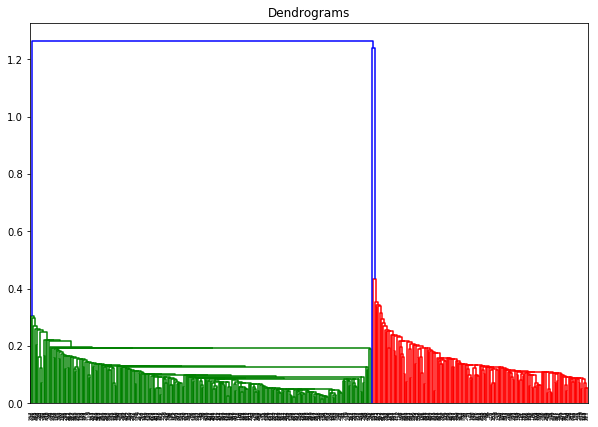

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='single'))

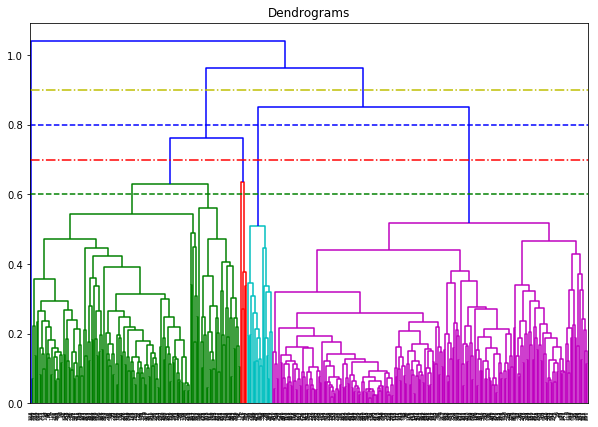

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))
plt.axhline(y=0.6, color='g', linestyle='--')
plt.axhline(y=0.7, color='r', linestyle='-.')
plt.axhline(y=0.8, color='b', linestyle='--')
plt.axhline(y=0.9, color='y', linestyle='-.')
plt.axhline(y=1.2, color='b', linestyle='-')

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(X)


array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [41]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
0,171,171,171,171,171,171,171,171
1,269,269,269,269,269,269,269,269


In [60]:
Cluster = X.groupby(['labels'])
Group=Cluster.head(5)
Group

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,0
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,0
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,1
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,1
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583,1
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056,1
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547,0
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667,0
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379,0


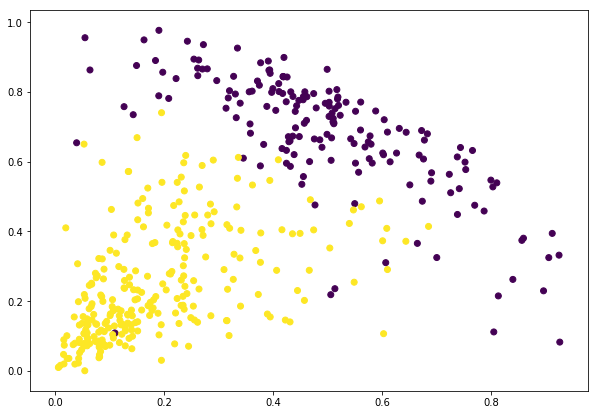

In [61]:
plt.figure(figsize=(10, 7))  
plt.scatter(X['Milk'], X['Grocery'], c=cluster.labels_) 